In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.speedup import calculate_speedups

%load_ext autoreload
%autoreload 2

sns.set_theme()

## Read data

In [2]:
threads = 32
sleeping_thresholds = [500]

fixed_frequency_df = None
master_df = None

for i in range(1, threads + 1):
    for st in sleeping_thresholds:
        filename = '01-07-2022/speedup-new-algorithm-{}-threads-{}-us-1.25.csv'.format(i, st)
        new_fixed_freq_df = pd.read_csv(filename)
        new_fixed_freq_df['threads'] = i
        new_fixed_freq_df['branch'] = '{}'.format(st)
        fixed_frequency_df = pd.concat([fixed_frequency_df, new_fixed_freq_df], ignore_index = True)
        
        filename = '01-07-2022/speedup-master-{}-threads-{}-us-1.25.csv'.format(i, st)
        new_master_df = pd.read_csv(filename)
        new_master_df['threads'] = i
        new_master_df['branch'] = 'master'
        master_df = pd.concat([master_df, new_master_df], ignore_index = True)

## Calculate speedups and prepare to plot

In [3]:
speedups_fixed_freq = calculate_speedups(fixed_frequency_df)
speedups_fixed_freq_df = pd.DataFrame(data=speedups_fixed_freq)

speedups_master = calculate_speedups(master_df)
speedups_master_df = pd.DataFrame(data=speedups_master)

df = pd.concat([speedups_fixed_freq_df, speedups_master_df], ignore_index = True)

## Plot fixed frequency speedups

Text(24, 8.329567029404956, 'threads = 24')

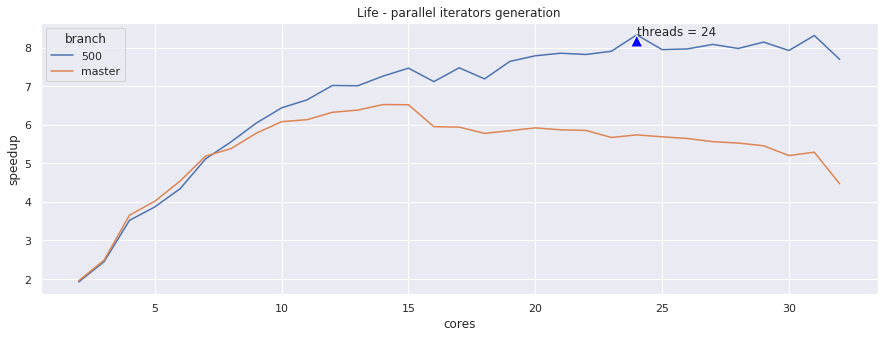

In [5]:

fig, ax = plt.subplots(1, figsize=(15, 5))

sns.lineplot(x='cores', y='speedup', hue='branch', data=df, ax=ax);
ax.set_title(df['name'].values[0]);

ymax = max(df['speedup'])
xmax = df[df['speedup'] == ymax]['cores'].iloc[0]
ax.annotate('threads = {}'.format(xmax), \
            xy=(xmax, ymax), xycoords='data', \
            xytext=(xmax, ymax), textcoords='data', \
            arrowprops=dict(facecolor='blue', shrink=0.05))
    

## Conclusion
